In [158]:
import sqlite3 as sql
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

connection = sql.connect('test.db')

In [7]:
def query(query_string, connection):
    return pd.read_sql_query(query_string, connection)

# Section 1 - Queries involving selection and projection
1. Print the names and IDs of the teams participating in the Overwatch League™️

In [17]:
query('select TEAM_ID, TEAM_NAME from teams', connection)

,TEAM_ID,TEAM_NAME
0,4409,Seoul Dynasty
1,4403,New York Excelsior
2,4402,Boston Uprising
3,7696,Vancouver Titans
4,7698,Atlanta Reign
5,4524,Philadelphia Fusion
6,4404,San Francisco Shock
7,7695,Toronto Defiant
8,4408,Shanghai Dragons
9,7693,Hangzhou Spark


2. Print the names of the cities the teams are from

In [11]:
query('select TEAM_LOCATION from TEAMS', connection)

,TEAM_LOCATION
0,Seoul
1,"New York City, NY"
2,"Boston, MA"
3,Vancouver
4,"Atlanta, GA"
5,"Philadelphia, PA"
6,"San Francisco, CA"
7,Toronto
8,Shanghai
9,Hangzhou


# Section 2 - Queries joining two relations
1. Print the names and handles of the players from the Vancouver Titans team

In [18]:
query('select name, handle from players natural join teams where team_id=7696', connection)

,NAME,HANDLE
0,Jang Hyun Hwang,TiZi
1,Dong-Eun Lee,Hooreg
2,Juseok Lee,Twilight
3,MinSoo Seo,SeoMinSoo
4,Sangbeom Park,BUMPER
5,Chunghee Lee,Stitch
6,Hyojong Kim,Haksal
7,Seong jun Kim,SLIME
8,Jun Keun Kim,RAPEL
9,HyunWoo Choi,JJANU


2. Print the name of the team that won most matches in the league

In [31]:
query('select TEAM_NAME, count(TEAM_NAME) as \'Number of Wins\' from matches join teams on matches.winner_id=teams.team_id group by TEAM_NAME order by count(team_name) desc limit 1', connection)

,TEAM_NAME,Number of Wins
0,San Francisco Shock,35


3. Print the name of the map that was played the most in the league

In [37]:
query('select map, count(map) as \'Number of plays\' from games natural join matches where map <> \'None\'group by map order by count(map) desc limit 1', connection)

,MAP,Number of plays
0,ilios,100


# Section 3 - Queries involving three or more relations
1. Print the names and handles of the players that compose the winner team in the last match of the league, as well as the team's name

In [86]:
query('select name, handle, team_name from players '
      'natural join teams '
      'inner join matches on matches.winner_id=teams.team_id '
      'order by timestamp desc '
      'limit (select count(competitor_id) from '
      '(select * from players where team_id=(select winner_id from matches order by timestamp desc limit 1)))'
      , connection)

,NAME,HANDLE,TEAM_NAME
0,Hyobin Choi,Choihyobin,San Francisco Shock
1,Myeong Hwan Yoo,Smurf,San Francisco Shock
2,Grant Espe,moth,San Francisco Shock
3,Matthew DeLisi,super,San Francisco Shock
4,Jay Won,sinatraa,San Francisco Shock
5,DongJun Kim,Rascal,San Francisco Shock
6,NamJu Gwon,STRIKER,San Francisco Shock
7,Minho Park,Architect,San Francisco Shock
8,Minki Park,Viol2t,San Francisco Shock


2. Print the maps played by Dallas Fuel in their last match

In [92]:
query('select distinct map from games '
      'where match_id='
      '(select match_id from matches where winner_id='
      '(select team_id from teams where team_name=\'Dallas Fuel\') order by timestamp desc)'
     ,connection)

,MAP
0,oasis
1,volskaya
2,eichenwalde
3,None


3. Print the name of the last team to win in 'eichenwalde'

In [97]:
query('select team_name from teams where team_id = ('
      'select winner_id from matches where match_id = ('
      'select match_id from games where map=\'eichenwalde\'))'
      , connection)

,TEAM_NAME
0,San Francisco Shock


# Section 4 - Queries aggregating results of at least  two relations
1. How many games did 'San Francisco Shock' win?

In [102]:
win_query = ('select count(game_id) as wins from games where match_id in ('
      'select match_id from matches where winner_id=('
      'select team_id from teams where team_name=\'San Francisco Shock\'))')

query(win_query, connection)

,wins
0,144


2. How many games did 'San Francisco Shock' play?

In [101]:
total_query = ('select count(game_id) as wins from games where match_id in ('
      'select match_id from matches where team_one_id = ('
      'select team_id from teams where team_name=\'San Francisco Shock\') or team_two_id = ('
      'select team_id from teams where team_name=\'San Francisco Shock\'))')

query(total_query, connection)

,wins
0,188


# Extra Section - Report Queries
1. How many 'support' players play in each team?

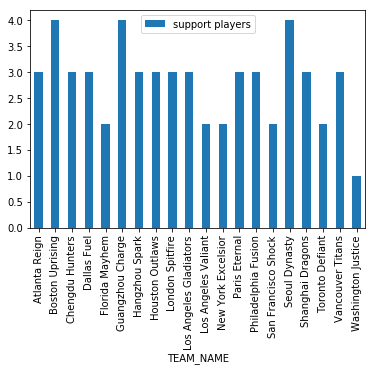

In [171]:
query_response = query('select team_name, count(role) as \'support players\' from teams '
      'natural join players where role=\'support\' group by team_name'
       , connection)

query_response.plot(x ='TEAM_NAME', y='support players', kind = 'bar')

2. How many times was each map played?

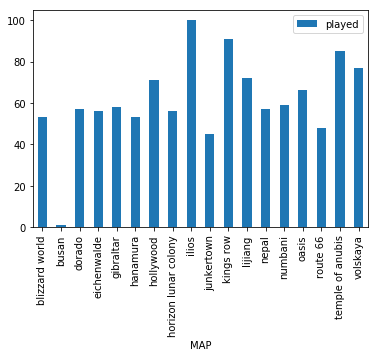

In [174]:
query_response = query('select map, count(map) as played from games where map <> \'None\'group by map', connection)

query_response.plot(x ='MAP', y='played', kind = 'bar')